In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
train_redu = pd.read_csv('dataset/train_redu.csv')
test_redu = pd.read_csv('dataset/test_redu.csv')

x_train = [(x,y) for x, y in zip(train_redu['intensidade'], train_redu['simetria'])]
y_train = train_redu['label']

x_test = [(x,y) for x, y in zip(test_redu['intensidade'], test_redu['simetria'])]
y_test = test_redu['label']

In [70]:
#transformando em vetor para poder aplicar metodos
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.T
x_test = x_test.T
y_test = y_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)

In [71]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2, 2186)
Shape of y_train :  (1, 2186)
Shape of x_test :  (2, 1115)
Shape of y_test :  (1, 1115)


### 1 x todos

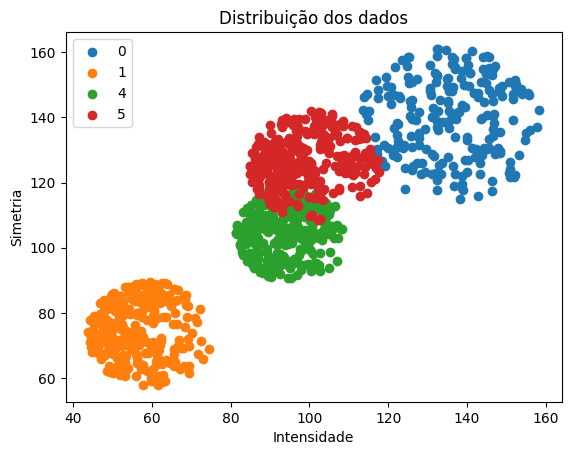

In [72]:
filtrado = test_redu[test_redu['label'].isin([0, 1, 4, 5])]

label_0 = filtrado[filtrado['label'] == 0]
label_1 = filtrado[filtrado['label'] == 1]
label_4 = filtrado[filtrado['label'] == 4]
label_5 = filtrado[filtrado['label'] == 5]

plt.scatter(label_0['intensidade'], label_0['simetria'], label='0')
plt.scatter(label_1['intensidade'], label_1['simetria'], label='1')
plt.scatter(label_4['intensidade'], label_4['simetria'], label='4')
plt.scatter(label_5['intensidade'], label_5['simetria'], label='5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [73]:
classes = np.unique(y_train)
y_train_bin = {}

for i, cls in enumerate(classes):
    print(i, cls)
    y_train_bin[cls] = np.where(y_train == cls, 0, 1)

y_train_bin

0 0
1 1
2 4
3 5


{np.int64(0): array([[0, 0, 0, ..., 1, 1, 1]]),
 np.int64(1): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(4): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(5): array([[1, 1, 1, ..., 0, 0, 0]])}

### Funções

In [74]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [75]:
def acuracia(y, pred, conjunto):

    total = len(y[0])

    acertos = 0

    for i in range(total):
        if pred[0][i] == y[0][i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

In [76]:
def regressao_logistica(X, Y, titulo, learning_rate = 0.0015, iterations = 100000):
    
    #numero de amostras
    m = x_train.shape[1]
    
    #numero de features
    n = x_train.shape[0]
    
    #matriz de pesos
    W = np.zeros((n,1))

    #bias
    B = 0
    
    cost_list = []

    print(f'para o conjunto de {titulo}')
    print('')
    
    for i in range(iterations):
        
        #forward propagation
        Z = np.dot(W.T, X) + B

        #sigmoid
        A = sigmoide(Z)

        #custo
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        #gradiente descendente
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        #historico de custo
        cost_list.append(cost)
        

        if(i%(iterations/10) == 0):
            print(f"custo depois de {i} iterações:", cost)


    print('')
    #predições    
    Z_final = np.dot(W.T, X) + B
    A_final = sigmoide(Z_final)
    
    y_pred = np.where(A_final >= 0.5, 1, 0)

    return W, B, cost_list, y_pred
        

In [77]:
W, B, hist_custo, y_pred_treino = {}, {}, {}, {}

for cls in classes:
    W[cls], B[cls], hist_custo[cls], y_pred_treino[cls] = regressao_logistica(x_train, y_train_bin[cls], cls)

para o conjunto de 0

custo depois de 0 iterações: 0.6931471805599453
custo depois de 10000 iterações: 0.9776457193304061
custo depois de 20000 iterações: 0.950847186320478
custo depois de 30000 iterações: 0.9244135919497496
custo depois de 40000 iterações: 0.898353187698356
custo depois de 50000 iterações: 0.8726826520505488
custo depois de 60000 iterações: 0.8474275152243553
custo depois de 70000 iterações: 0.822621127448705
custo depois de 80000 iterações: 0.7983026952765092
custo depois de 90000 iterações: 0.774514762457764

para o conjunto de 1

custo depois de 0 iterações: 0.6931471805599453
custo depois de 10000 iterações: 0.48501941615027394
custo depois de 20000 iterações: 0.45099163773148293
custo depois de 30000 iterações: 0.47158149370877006
custo depois de 40000 iterações: 0.42135669842265977
custo depois de 50000 iterações: 0.339372898703003
custo depois de 60000 iterações: 0.2656906545152667
custo depois de 70000 iterações: 0.2029130609357002
custo depois de 80000 iteraç

### Vizualização Gráfica

Linha de Decisão:

$$y = -\left(\frac{W[0] * x + B}{W[1]}\right)$$

Onde:
<br>
- $W[i] (pesos) ajustam a inclinação da reta <br>
- $B$ (bias) ajusta a posição da reta no gráfico <br>
- $x$ representa a lista ($x_{min}$, $x_{max}$)


In [141]:
def linha_decisao(W, B, X):
    
    #limites
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_min = float(-(W[0] * x_min + B) / W[1])
    y_max = float(-(W[0] * x_max + B) / W[1])

    coord_min = (x_min, y_min)
    coord_max = (x_max, y_max)

    #linha de decisao
    coord = [coord_min, coord_max]

    for cod in coord:
        print(f"Ponto: {cod}")
    
    return coord

In [142]:
linhas = []

for cls in classes:
    linhas.append(linha_decisao(W[cls], B[cls], x_train))

linhas[0]

Ponto: (np.float64(144.43529411764706), 132.2072999239943)
Ponto: (np.float64(149.57254901960783), 137.91332784535638)
Ponto: (np.float64(144.43529411764706), 1483.667614072432)
Ponto: (np.float64(149.57254901960783), 1579.0173859728625)
Ponto: (np.float64(144.43529411764706), 27.493623902672905)
Ponto: (np.float64(149.57254901960783), 28.169351936167228)
Ponto: (np.float64(144.43529411764706), 140.72291864550513)
Ponto: (np.float64(149.57254901960783), 144.72324982821453)


C:\Users\kamil\AppData\Local\Temp\ipykernel_32136\3706030843.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_min = float(-(W[0] * x_min + B) / W[1])
C:\Users\kamil\AppData\Local\Temp\ipykernel_32136\3706030843.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_max = float(-(W[0] * x_max + B) / W[1])


[(np.float64(144.43529411764706), 132.2072999239943),
 (np.float64(149.57254901960783), 137.91332784535638)]

(np.float64(144.43529411764706), 132.2072999239943)

(np.float64(149.57254901960783), 137.91332784535638)
(np.float64(144.43529411764706), 1483.667614072432)

(np.float64(149.57254901960783), 1579.0173859728625)
(np.float64(144.43529411764706), 27.493623902672905)

(np.float64(149.57254901960783), 28.169351936167228)
(np.float64(144.43529411764706), 140.72291864550513)

(np.float64(149.57254901960783), 144.72324982821453)


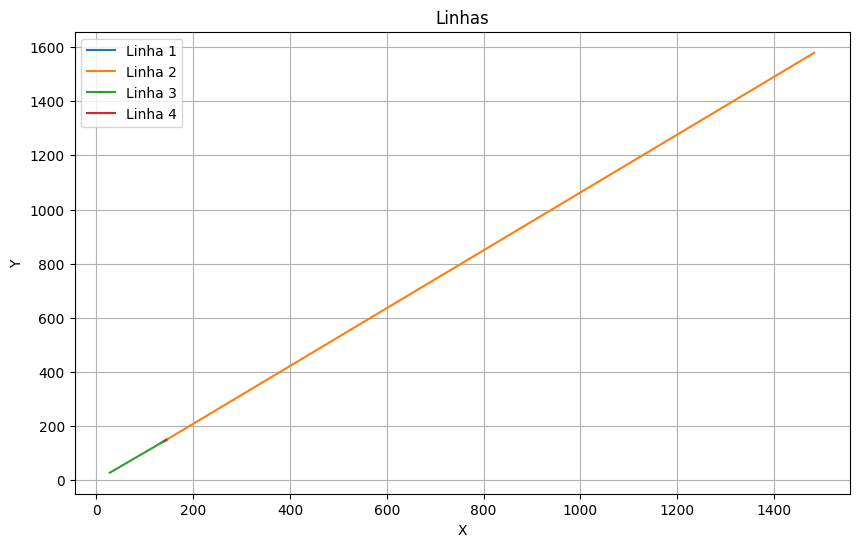

In [148]:
plt.figure(figsize=(10, 6))

for linha in linhas:
    x_values, y_values = linha
    print(x_values)
    print('')
    print(y_values)
    plt.plot(x_values, y_values, label='Linha de Decisão')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linhas')
plt.legend(['Linha 1', 'Linha 2', 'Linha 3', 'Linha 4'])
plt.grid(True)
plt.show()

In [152]:
def classificacao_plot(W, B, X, y, y_pred, classe):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_values = -(W[0] * np.array([x_min, x_max]) + B) / W[1]
    
    plt.plot([x_min, x_max], y_values, color='green', label='Linha de Decisão')

    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', label='Dados Reais')    
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x', label='Predições', alpha=0.6)

    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.title(f'Treinamento e Decisão da Classe {classe}')
    plt.legend()
    plt.show()

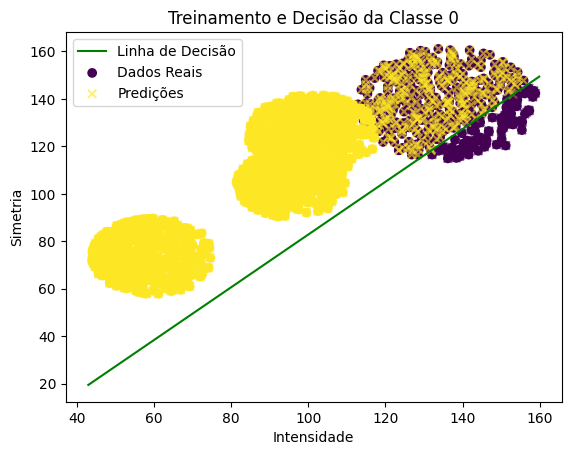

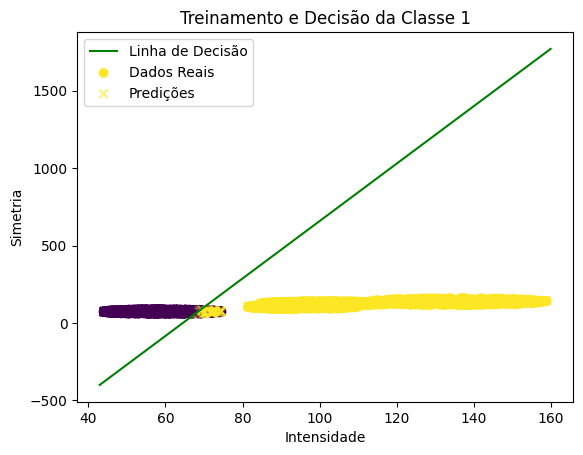

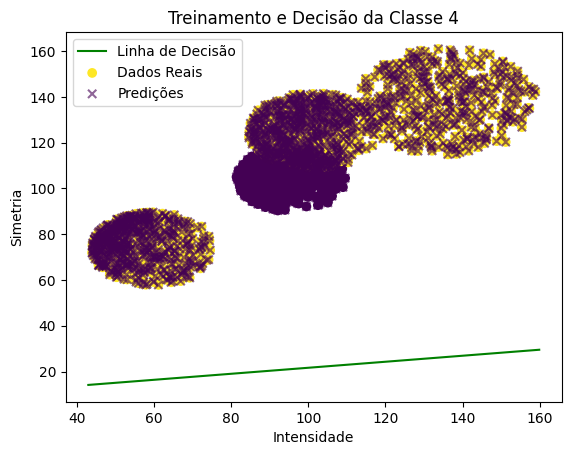

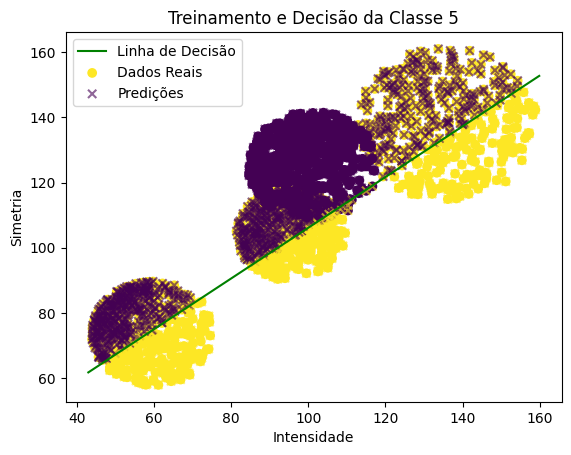

In [151]:
for cls in classes:
    classificacao_plot(W[cls], B[cls], x_train.T, y_train_bin[cls].flatten(), y_pred_treino[cls].flatten(), cls)

In [163]:
def teste_plot(W, B, X, cls):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_values = -(W[0] * np.array([x_min, x_max]) + B) / W[1]
    
    plt.plot([x_min, x_max], y_values, label=f'linha {cls}')

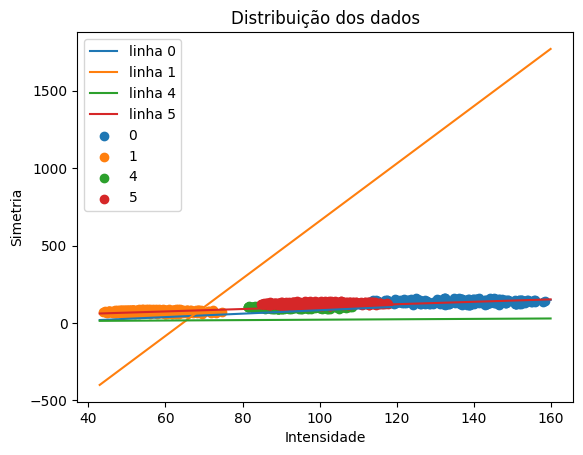

In [176]:
for cls in classes:
    teste_plot(W[cls], B[cls], x_train.T, cls)


filtrado = test_redu[test_redu['label'].isin([0, 1, 4, 5])]

label_0 = filtrado[filtrado['label'] == 0]
label_1 = filtrado[filtrado['label'] == 1]
label_4 = filtrado[filtrado['label'] == 4]
label_5 = filtrado[filtrado['label'] == 5]

plt.scatter(label_0['intensidade'], label_0['simetria'], label='0')
plt.scatter(label_1['intensidade'], label_1['simetria'], label='1')
plt.scatter(label_4['intensidade'], label_4['simetria'], label='4')
plt.scatter(label_5['intensidade'], label_5['simetria'], label='5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

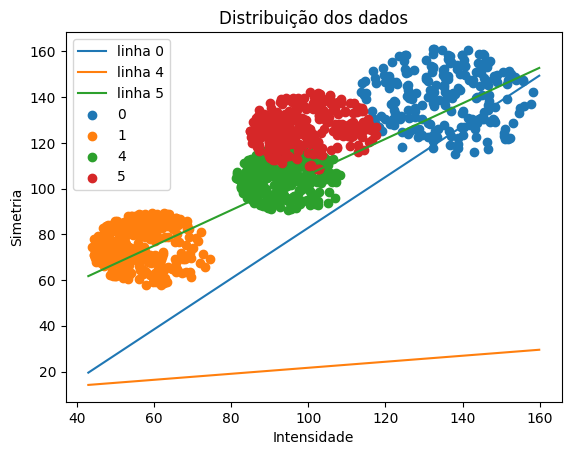

In [177]:
for cls in classes:
    if cls != 1:
        teste_plot(W[cls], B[cls], x_train.T, cls)


filtrado = test_redu[test_redu['label'].isin([0, 1, 4, 5])]

label_0 = filtrado[filtrado['label'] == 0]
label_1 = filtrado[filtrado['label'] == 1]
label_4 = filtrado[filtrado['label'] == 4]
label_5 = filtrado[filtrado['label'] == 5]

plt.scatter(label_0['intensidade'], label_0['simetria'], label='0')
plt.scatter(label_1['intensidade'], label_1['simetria'], label='1')
plt.scatter(label_4['intensidade'], label_4['simetria'], label='4')
plt.scatter(label_5['intensidade'], label_5['simetria'], label='5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

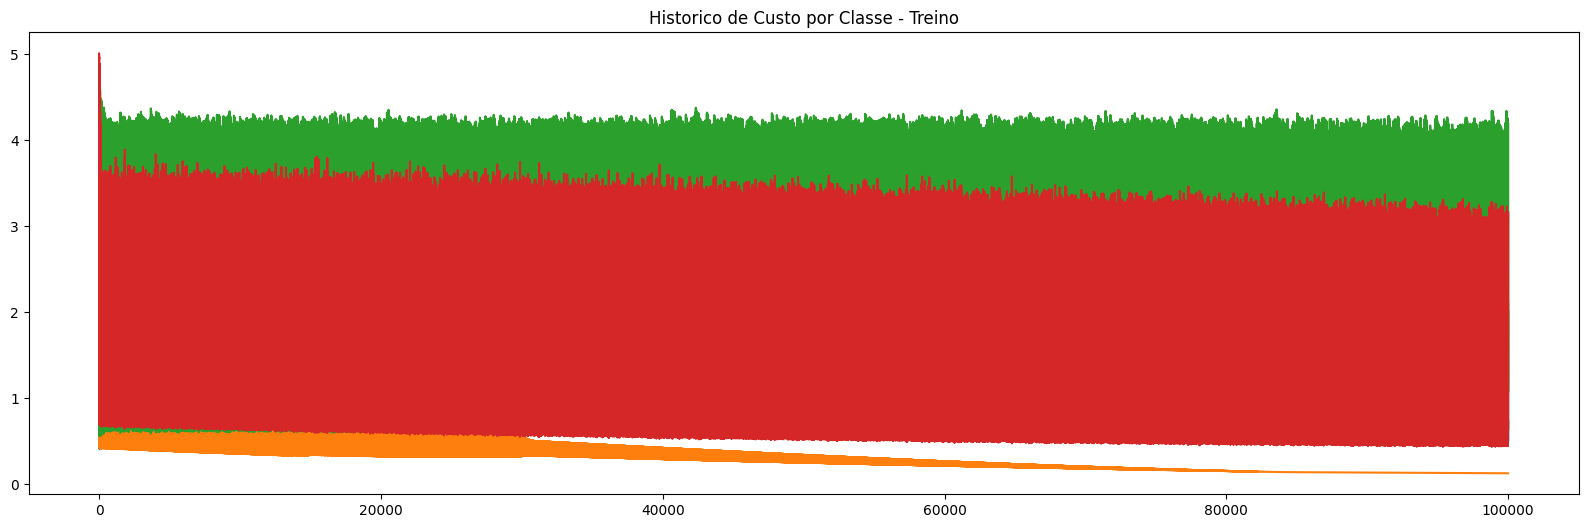

In [ ]:
iteracoes = 100000

plt.figure(figsize=(20,6))

for cls in classes:
    plt.plot(np.arange(iteracoes), hist_custo[cls])
    
plt.title(f'Historico de Custo por Classe - Treino')
plt.show()

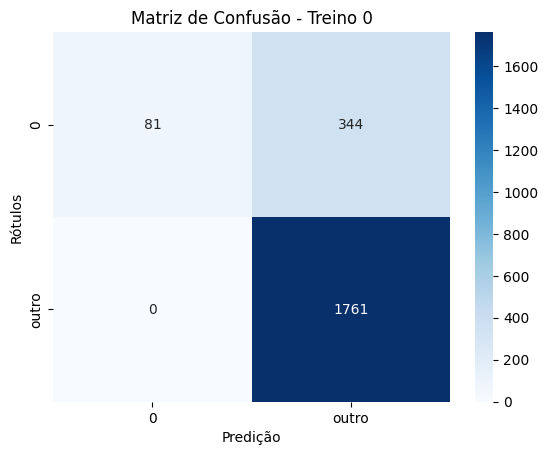

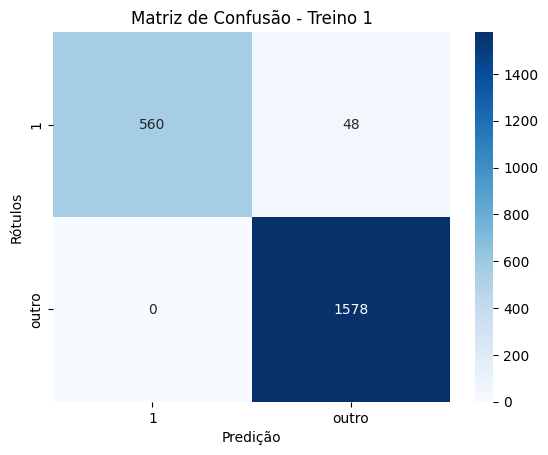

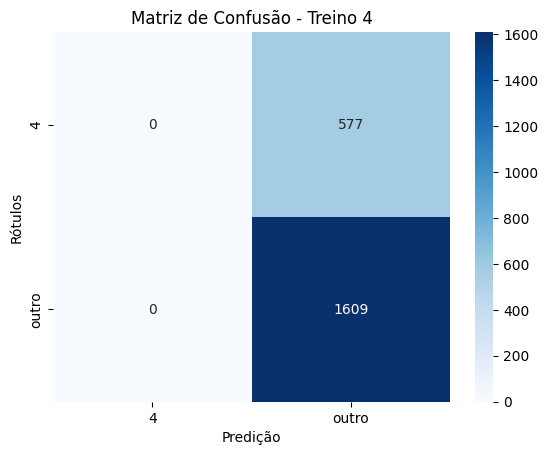

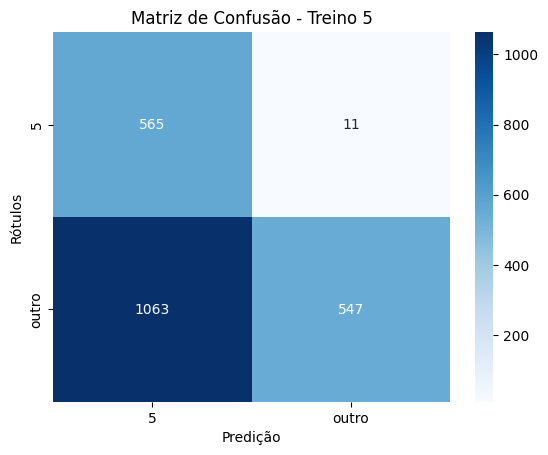

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for cls in classes:  

    #convertendo em vetores 1D
    y_train_f = y_train_bin[cls].flatten()
    y_pred_f = y_pred_treino[cls].flatten()

    cm = confusion_matrix(y_train_f, y_pred_f)

    sns.heatmap(cm, annot=True, fmt='d',
                cmap='Blues',
                xticklabels=[cls, 'outro'], 
                yticklabels=[cls, 'outro'])
    
    plt.xlabel('Predição')
    plt.ylabel('Rótulos')
    plt.title(f'Matriz de Confusão - Treino {cls}')
    plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

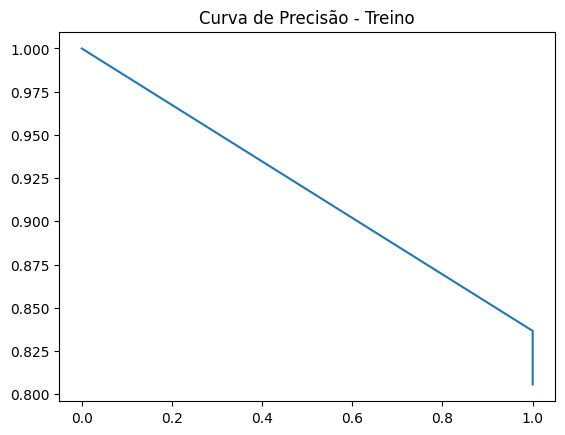

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


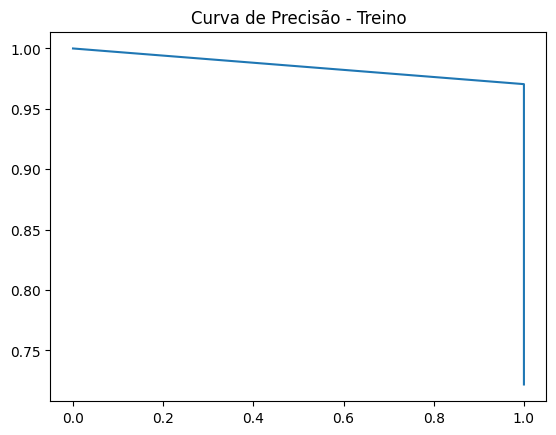

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

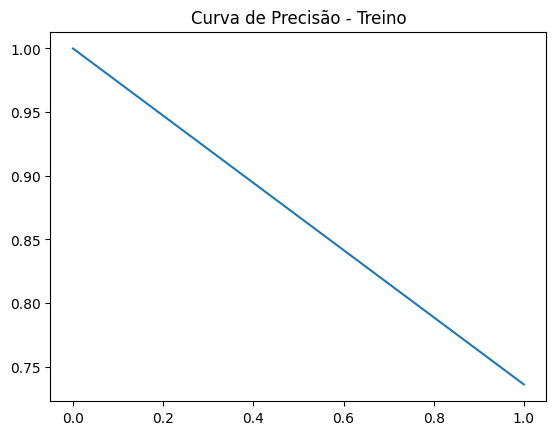

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

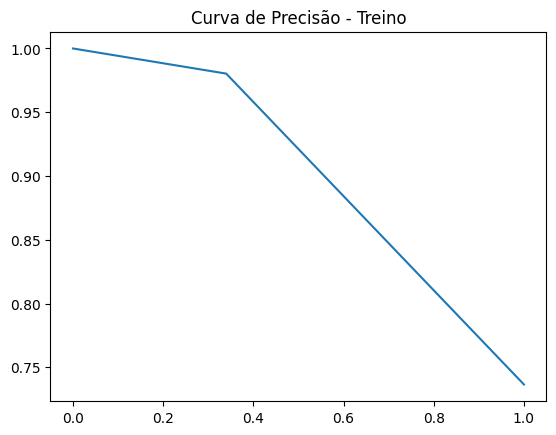

In [175]:
#incompleto - falta verificar umas coisas

from sklearn.metrics import precision_recall_curve, classification_report

for cls in classes:
    report = classification_report(y_train_bin[cls], y_pred_treino[cls])
    #precisão x sensibilidade*
    precision, recall, _ = precision_recall_curve(y_train_bin[cls].flatten(), y_pred_treino[cls].flatten())

    print(report)

    plt.plot(recall, precision)
    plt.title('Curva de Precisão - Treino')
    plt.show()

#### Falta o F1-score

### Eficiência da Classificação

In [178]:
for cls in classes:
    print(f"Para a classe {cls}")
    acuracia(y_train_bin[cls], y_pred_treino[cls], "teste")
    print('')

Para a classe 0
Acuracia do modelo no conjunto teste:  84.26349496797805 %

Para a classe 1
Acuracia do modelo no conjunto teste:  97.80420860018299 %

Para a classe 4
Acuracia do modelo no conjunto teste:  73.60475754803294 %

Para a classe 5
Acuracia do modelo no conjunto teste:  50.86916742909423 %



In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for cls in classes:
    
    print(f'Metricas de Erro - Treino {cls}')
    print("Erro médio quadrático: ", mean_squared_error(y_train_bin[cls], y_pred_treino[cls]))
    print("Erro médio absoluto: ", mean_absolute_error(y_train_bin[cls], y_pred_treino[cls]))
    print('')

Metricas de Erro - Treino 0
Erro médio quadrático:  0.15736505032021958
Erro médio absoluto:  0.15736505032021958

Metricas de Erro - Treino 1
Erro médio quadrático:  0.021957913998170174
Erro médio absoluto:  0.021957913998170174

Metricas de Erro - Treino 4
Erro médio quadrático:  0.26395242451967066
Erro médio absoluto:  0.26395242451967066

Metricas de Erro - Treino 5
Erro médio quadrático:  0.49130832570905764
Erro médio absoluto:  0.49130832570905764

